# **1. Problem Formulation:**

- We want to understand the factors that affect the Air Quality Index

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **2. Loading the Raw Data**

In [2]:
# Loading the data
raw_data = pd.read_csv(r"/kaggle/input/after-combine/data_2015_2024.csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(1465292, 28)


,Unnamed: 0,Date,Country,City,aqi,co,mepaqi,neph,no2,o3,...,pm1,pressure,temperature,wd,wind-speed,precipitation,wind-gust,dew,wind gust,wind speed
0,0,2014-12-29,AT,Graz,NaN,0.1,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2014-12-29,AT,Innsbruck,NaN,0.1,NaN,NaN,25.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2014-12-29,AT,Linz,NaN,0.1,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2014-12-29,AT,Salzburg,NaN,0.1,NaN,NaN,21.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2014-12-29,AT,Vienna,NaN,0.1,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Find the minimum and maximum dates
min_date = raw_data['Date'].min()
max_date = raw_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2025-01-09


# **3. Data Preprocessing**

# **3.1 - Investigating dataset**

In [4]:
raw_data.columns

Index(['Unnamed: 0', 'Date', 'Country', 'City', 'aqi', 'co', 'mepaqi', 'neph',
       'no2', 'o3', 'pm10', 'pm25', 'psi', 'so2', 'uvi', 'pol', 'd',
       'humidity', 'pm1', 'pressure', 'temperature', 'wd', 'wind-speed',
       'precipitation', 'wind-gust', 'dew', 'wind gust', 'wind speed'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465292 entries, 0 to 1465291
Data columns (total 28 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1465292 non-null  int64  
 1   Date           1465292 non-null  object 
 2   Country        1465292 non-null  object 
 3   City           1465292 non-null  object 
 4   aqi            40205 non-null    float64
 5   co             921954 non-null   float64
 6   mepaqi         2827 non-null     float64
 7   neph           4672 non-null     float64
 8   no2            1212648 non-null  float64
 9   o3             1131028 non-null  float64
 10  pm10           1195066 non-null  float64
 11  pm25           1233400 non-null  float64
 12  psi            363 non-null      float64
 13  so2            1010888 non-null  float64
 14  uvi            29032 non-null    float64
 15  pol            4958 non-null     float64
 16  d              2031 non-null     float64
 17  humidity

In [6]:
raw_data.describe()

,Unnamed: 0,aqi,co,mepaqi,neph,no2,o3,pm10,pm25,psi,...,pm1,pressure,temperature,wd,wind-speed,precipitation,wind-gust,dew,wind gust,wind speed
count,1.465292e+06,40205.000000,921954.000000,2827.000000,4672.000000,1.212648e+06,1.131028e+06,1.195066e+06,1.233400e+06,363.000000,...,5374.000000,1.107820e+06,1.112923e+06,81186.000000,1.049742e+06,120279.000000,608138.000000,849061.000000,31765.000000,49751.000000
mean,7.326455e+05,50.244596,4.858084,55.851928,8.886772,1.003012e+01,2.089570e+01,2.774480e+01,5.530587e+01,50.696970,...,78.210421,9.942198e+02,1.583808e+01,172.288199,2.794207e+00,52.474873,6.807711,10.129020,7.213058,3.220261
std,4.229935e+05,32.333703,8.917392,27.032666,9.213576,1.078056e+01,1.604966e+01,2.812178e+01,4.169659e+01,9.390348,...,44.311966,1.166472e+02,1.015027e+01,89.309539,7.038533e+00,100.600153,5.730232,9.611269,5.614965,7.317323
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,25.000000,...,3.700000,-2.889600e+03,-8.290000e+01,0.000000,0.000000e+00,-1944.400000,0.100000,-64.300000,0.100000,0.100000
25%,3.663228e+05,34.000000,1.400000,42.350000,4.000000,4.700000e+00,1.210000e+01,1.200000e+01,2.500000e+01,43.500000,...,46.800000,1.007400e+03,9.300000e+00,112.500000,1.500000e+00,0.400000,3.300000,4.000000,3.300000,1.500000
50%,7.326455e+05,49.000000,3.400000,55.800000,7.000000,7.800000e+00,2.010000e+01,2.000000e+01,4.600000e+01,52.000000,...,69.000000,1.013500e+03,1.630000e+01,180.000000,2.200000e+00,2.600000,5.700000,10.000000,6.000000,2.400000
75%,1.098968e+06,59.000000,5.800000,68.550000,11.000000,1.280000e+01,2.770000e+01,3.500000e+01,7.000000e+01,57.000000,...,102.000000,1.019000e+03,2.330000e+01,247.500000,3.300000e+00,99.000000,9.200000,17.000000,10.000000,3.800000
max,1.465291e+06,481.000000,500.000000,265.100000,255.000000,5.000000e+02,5.000000e+02,9.990000e+02,9.990000e+02,75.000000,...,222.000000,2.943000e+03,9.999000e+02,360.000000,9.999000e+02,2120.500000,688.600000,31.500000,255.000000,289.800000


In [7]:
# Investigate all the elements whithin each Feature

for column in raw_data:
    # Handle numerical and string columns differently
    if raw_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = raw_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(raw_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Unnamed: 0 :1465292
The number of values for feature Date :2867
The number of values for feature Country :95
The number of values for feature City :616
The number of values for feature aqi :315
The number of values for feature co :934
The number of values for feature mepaqi :810
The number of values for feature neph :66
The number of values for feature no2 :1115
The number of values for feature o3 :1316
The number of values for feature pm10 :1157
The number of values for feature pm25 :946
The number of values for feature psi :50
The number of values for feature so2 :1078
The number of values for feature uvi :58
The number of values for feature pol :9 -- [-3.0656e+03 -2.3168e+03 -2.2528e+03 -5.4960e+02  0.0000e+00  1.0000e+00
  5.0000e+00  8.0000e+00         nan]
The number of values for feature d :68
The number of values for feature humidity :1122
The number of values for feature pm1 :461
The number of values for feature pressure :5444
The number of val

# **3.2 - Removing Duplicates and Null values(Instance/Column)**

In [8]:
raw_data.isna().sum()

Unnamed: 0             0
Date                   0
Country                0
City                   0
aqi              1425087
co                543338
mepaqi           1462465
neph             1460620
no2               252644
o3                334264
pm10              270226
pm25              231892
psi              1464929
so2               454404
uvi              1436260
pol              1460334
d                1463261
humidity          353390
pm1              1459918
pressure          357472
temperature       352369
wd               1384106
wind-speed        415550
precipitation    1345013
wind-gust         857154
dew               616231
wind gust        1433527
wind speed       1415541
dtype: int64

In [9]:
raw_data.columns

Index(['Unnamed: 0', 'Date', 'Country', 'City', 'aqi', 'co', 'mepaqi', 'neph',
       'no2', 'o3', 'pm10', 'pm25', 'psi', 'so2', 'uvi', 'pol', 'd',
       'humidity', 'pm1', 'pressure', 'temperature', 'wd', 'wind-speed',
       'precipitation', 'wind-gust', 'dew', 'wind gust', 'wind speed'],
      dtype='object')

In [10]:
# removing columns where missing values is more than 600,000
new_data = raw_data.drop(['Unnamed: 0','aqi','mepaqi','neph', 'psi','uvi', 'pol', 'd','pm1','wd',
                         'precipitation', 'wind-gust', 'dew', 'wind gust', 'wind speed'], axis=1)

In [11]:
new_data.columns

Index(['Date', 'Country', 'City', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'humidity', 'pressure', 'temperature', 'wind-speed'],
      dtype='object')

In [12]:
new_data.isna().sum()

Date                0
Country             0
City                0
co             543338
no2            252644
o3             334264
pm10           270226
pm25           231892
so2            454404
humidity       353390
pressure       357472
temperature    352369
wind-speed     415550
dtype: int64

In [13]:
# removing rows where 'pm10', 'pm25' all are missing
# most cases pm10, pm25 have direct influence in AQI count
new_data = new_data.dropna(subset=['pm10', 'pm25'], how='all', inplace=False)

In [14]:
new_data.shape

(1391290, 13)

In [15]:
new_data.isna().sum()

Date                0
Country             0
City                0
co             474538
no2            194130
o3             272347
pm10           196224
pm25           157890
so2            396738
humidity       337957
pressure       342220
temperature    337110
wind-speed     395710
dtype: int64

In [16]:
# check for duplicates rows
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = new_data[new_data.duplicated()]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Date,Country,City,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
508559,2019-09-30,AE,Abu Dhabi,0.1,9.2,20.8,82.0,157.0,4.6,63.0,1006.0,33.0,3.6
508560,2019-09-30,AE,Dubai,NaN,NaN,14.3,NaN,159.0,NaN,62.0,1006.0,34.0,4.1
508561,2019-09-30,AR,Buenos Aires,6.2,8.7,4.9,27.0,46.0,9.7,61.2,1003.8,21.4,8.4
508562,2019-09-30,AT,Graz,0.1,7.8,NaN,12.0,NaN,1.1,66.0,1009.0,16.3,0.8
508563,2019-09-30,AT,Innsbruck,0.1,11.5,NaN,12.0,NaN,0.6,73.5,1009.5,12.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339097,2023-10-01,RO,Timişoara,NaN,8.8,16.0,16.0,NaN,3.6,66.0,1011.7,18.5,2.0
1339104,2023-10-01,SK,Bratislava,1.9,3.7,NaN,11.0,21.0,2.1,73.9,1025.0,15.5,2.0
1339105,2023-10-01,SK,Košice,3.9,3.7,NaN,14.0,30.0,7.1,78.5,1021.4,13.3,3.0
1339106,2023-10-01,SV,San Salvador,NaN,NaN,NaN,NaN,42.0,NaN,67.5,1015.5,23.0,1.0


In [17]:
# Remove duplicate rows
new_data_cleaned = new_data.drop_duplicates()

# Verify the removal of duplicates
print(f"Shape of original data: {new_data.shape}")
print(f"Shape after removing duplicates: {new_data_cleaned.shape}")

Shape of original data: (1391290, 13)
Shape after removing duplicates: (1339286, 13)


In [18]:
new_data_cleaned.head()

,Date,Country,City,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
0,2014-12-29,AT,Graz,0.1,9.0,NaN,13.0,NaN,1.6,NaN,NaN,NaN,NaN
1,2014-12-29,AT,Innsbruck,0.1,25.6,NaN,25.0,NaN,1.6,NaN,NaN,NaN,NaN
2,2014-12-29,AT,Linz,0.1,14.2,NaN,25.0,74.0,2.1,NaN,NaN,NaN,NaN
3,2014-12-29,AT,Salzburg,0.1,21.1,NaN,21.0,NaN,2.1,NaN,NaN,NaN,NaN
4,2014-12-29,AT,Vienna,0.1,9.0,NaN,20.0,65.0,2.6,NaN,NaN,NaN,NaN


🇦🇫 Afghanistan - 🇦🇱 Albania - 🇩🇿 Algeria - 🇦🇷 Argentina - 🇦🇲 Armenia - 🇦🇼 Aruba - 🇦🇺 Australia - 🇦🇹 Austria - 🇦🇿 Azerbaijan - 🇧🇭 Bahrain - 🇧🇩 Bangladesh - 🇧🇾 Belarus - 🇧🇪 Belgium - 🇧🇯 Benin - 🇧🇹 Bhutan - 🇧🇴 Bolivia - 🇧🇦 Bosnia and Herzegovina - 🇧🇷 Brazil - 🇧🇳 Brunei - 🇧🇬 Bulgaria - 🇧🇫 Burkina Faso - 🇧🇮 Burundi - 🇨🇻 Cabo Verde - 🇰🇭 Cambodia - 🇨🇲 Cameroon - 🇨🇦 Canada - 🇨🇱 Chile - 🇨🇳 China - 🇨🇴 Colombia - 🇨🇷 Costa Rica - 🇭🇷 Croatia - 🇨🇺 Cuba - 🇨🇾 Cyprus - 🇨🇿 Czechia - 🇨🇩 DR Congo - 🇩🇰 Denmark - 🇩🇴 Dominican Republic - 🇪🇨 Ecuador - 🇪🇬 Egypt - 🇸🇻 El Salvador - 🇪🇷 Eritrea - 🇪🇪 Estonia - 🇪🇹 Ethiopia - 🇫🇰 Falkland Islands - 🇫🇮 Finland - 🇫🇷 France - 🇬🇪 Georgia - 🇩🇪 Germany - 🇬🇭 Ghana - 🇬🇷 Greece - 🇬🇩 Grenada - 🇬🇹 Guatemala - 🇭🇳 Honduras - 🇭🇰 Hong Kong - 🇭🇺 Hungary - 🇮🇸 Iceland - 🇮🇳 India - 🇮🇩 Indonesia - 🇮🇷 Iran - 🇮🇶 Iraq - 🇮🇪 Ireland - 🇮🇱 Israel - 🇮🇹 Italy - 🇨🇮 Ivory Coast - 🇯🇵 Japan - 🇯🇴 Jordan - 🇰🇿 Kazakhstan - 🇰🇪 Kenya - 🇽🇰 Kosovo - 🇰🇼 Kuwait - 🇰🇬 Kyrgyzstan - 🇱🇦 Laos - 🇱🇻 Latvia - 🇱🇧 Lebanon - 🇱🇾 Libya - 🇱🇹 Lithuania - 🇱🇺 Luxembourg - 🇲🇴 Macao - 🇲🇬 Madagascar - 🇲🇾 Malaysia - 🇲🇻 Maldives - 🇲🇱 Mali - 🇲🇹 Malta - 🇲🇺 Mauritius - 🇲🇽 Mexico - 🇲🇩 Moldova - 🇲🇨 Monaco - 🇲🇳 Mongolia - 🇲🇪 Montenegro - 🇲🇦 Morocco - 🇲🇲 Myanmar - 🇳🇵 Nepal - 🇳🇿 New Zealand - 🇳🇮 Nicaragua - 🇳🇬 Nigeria - 🇲🇰 North Macedonia - 🇳🇴 Norway - 🇴🇲 Oman - 🇵🇰 Pakistan - 🇵🇦 Panama - 🇵🇬 Papua New Guinea - 🇵🇾 Paraguay - 🇵🇪 Peru - 🇵🇭 Philippines - 🇵🇱 Poland - 🇵🇹 Portugal - 🇵🇷 Puerto Rico - 🇶🇦 Qatar - 🇷🇴 Romania - 🇷🇺 Russia - 🇷🇼 Rwanda - 🇷🇪 Réunion - 🇸🇲 San Marino - 🇸🇦 Saudi Arabia - 🇸🇳 Senegal - 🇷🇸 Serbia - 🇸🇨 Seychelles - 🇸🇬 Singapore - 🇸🇰 Slovakia - 🇸🇮 Slovenia - 🇿🇦 South Africa - 🇰🇷 South Korea - 🇪🇸 Spain - 🇱🇰 Sri Lanka - 🇸🇪 Sweden - 🇨🇭 Switzerland - 🇸🇾 Syria - 🇹🇼 Taiwan - 🇹🇯 Tajikistan - 🇹🇭 Thailand - 🇳🇱 The Netherlands - 🇹🇬 Togo - 🇹🇹 Trinidad and Tobago - 🇹🇳 Tunisia - 🇹🇷 Türkiye - 🇻🇮 U.S. Virgin Islands - 🇺🇬 Uganda - 🇺🇦 Ukraine - 🇦🇪 United Arab Emirates - 🇬🇧 United Kingdom - 🇺🇸 United States - 🇺🇾 Uruguay - 🇺🇿 Uzbekistan - 🇻🇺 Vanuatu - 🇻🇪 Venezuela - 🇻🇳 Vietnam - 🇿🇲 Zambia - 🇿🇼 Zimbabwe -

In [19]:
new_data_cleaned['Country'].unique()

array(['AT', 'AU', 'BE', 'BO', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'CY',
       'CZ', 'DE', 'ES', 'FI', 'FR', 'GB', 'HK', 'HR', 'HU', 'IL', 'IN',
       'IT', 'JP', 'KR', 'LT', 'MN', 'MO', 'MX', 'NL', 'NO', 'PE', 'PL',
       'PT', 'RE', 'RU', 'SG', 'SK', 'SV', 'TH', 'TR', 'TW', 'US', 'VN',
       'ZA', 'DK', 'EC', 'RO', 'IR', 'SE', 'AE', 'MK', 'BG', 'RS', 'AR',
       'GT', 'ID', 'IS', 'NZ', 'BD', 'XK', 'BA', 'BH', 'ET', 'NP', 'KW',
       'EE', 'UG', 'LK', 'PH', 'IE', 'KZ', 'CW', 'PR', 'UZ', 'KG', 'JO',
       'UA', 'IQ', 'SA', 'LA', 'DZ', 'PK', 'MM', 'TJ', 'TM', 'GR', 'AF',
       'GE', 'CR', 'ML', 'CI', 'GN', 'GH'], dtype=object)

In [20]:
# Dictionary mapping abbreviations to full country names
country_mapping = {
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DE': 'Germany',
    'DK': 'Denmark',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'HK': 'Hong Kong',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IL': 'Israel',
    'IN': 'India',
    'IT': 'Italy',
    'JP': 'Japan',
    'KR': 'South Korea',
    'LT': 'Lithuania',
    'MN': 'Mongolia',
    'MO': 'Macao',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NL': 'The Netherlands',
    'NO': 'Norway',
    'PE': 'Peru',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RE': 'Réunion',
    'RU': 'Russia',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SV': 'El Salvador',
    'TH': 'Thailand',
    'TR': 'Türkiye',
    'TW': 'Taiwan',
    'US': 'United States',
    'VN': 'Vietnam',
    'ZA': 'South Africa',
    'EC': 'Ecuador',
    'RO': 'Romania',
    'IR': 'Iran',
    'SE': 'Sweden',
    'AE': 'United Arab Emirates',
    'MK': 'North Macedonia',
    'BG': 'Bulgaria',
    'RS': 'Serbia',
    'AR': 'Argentina',
    'PR': 'Puerto Rico',
    'GT': 'Guatemala',
    'ID': 'Indonesia',
    'IS': 'Iceland',
    'NZ': 'New Zealand',
    'BD': 'Bangladesh',
    'XK': 'Kosovo',
    'BA': 'Bosnia and Herzegovina',
    'BH': 'Bahrain',
    'ET': 'Ethiopia',
    'NP': 'Nepal',
    'KW': 'Kuwait',
    'EE': 'Estonia',
    'UG': 'Uganda',
    'LK': 'Sri Lanka',
    'PH': 'Philippines',
    'IE': 'Ireland',
    'KZ': 'Kazakhstan',
    'CW': 'Curaçao',
    'UZ': 'Uzbekistan',
    'KG': 'Kyrgyzstan',
    'UA': 'Ukraine',
    'JO': 'Jordan',
    'IQ': 'Iraq',
    'SA': 'Saudi Arabia',
    'LA': 'Laos',
    'DZ': 'Algeria',
    'PK': 'Pakistan',
    'MM': 'Myanmar',
    'TJ': 'Tajikistan',
    'TM': 'Turkmenistan',
    'GR': 'Greece',
    'AF': 'Afghanistan',
    'GE': 'Georgia',
    'CR': 'Costa Rica',
    'ML': 'Mali',
    'CI': 'Ivory Coast',
    'GN': 'Guinea',
    'GH': 'Ghana'
}

# Replace abbreviations with full country names
new_data_cleaned['Country'] = new_data_cleaned['Country'].replace(country_mapping)

new_data_cleaned.head()

<ipython-input-20-c44949f43a29>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_cleaned['Country'] = new_data_cleaned['Country'].replace(country_mapping)


,Date,Country,City,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
0,2014-12-29,Austria,Graz,0.1,9.0,NaN,13.0,NaN,1.6,NaN,NaN,NaN,NaN
1,2014-12-29,Austria,Innsbruck,0.1,25.6,NaN,25.0,NaN,1.6,NaN,NaN,NaN,NaN
2,2014-12-29,Austria,Linz,0.1,14.2,NaN,25.0,74.0,2.1,NaN,NaN,NaN,NaN
3,2014-12-29,Austria,Salzburg,0.1,21.1,NaN,21.0,NaN,2.1,NaN,NaN,NaN,NaN
4,2014-12-29,Austria,Vienna,0.1,9.0,NaN,20.0,65.0,2.6,NaN,NaN,NaN,NaN


In [21]:
new_data_cleaned['Country'].unique()

array(['Austria', 'Australia', 'Belgium', 'Bolivia', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czechia',
       'Germany', 'Spain', 'Finland', 'France', 'United Kingdom',
       'Hong Kong', 'Croatia', 'Hungary', 'Israel', 'India', 'Italy',
       'Japan', 'South Korea', 'Lithuania', 'Mongolia', 'Macao', 'Mexico',
       'The Netherlands', 'Norway', 'Peru', 'Poland', 'Portugal',
       'Réunion', 'Russia', 'Singapore', 'Slovakia', 'El Salvador',
       'Thailand', 'Türkiye', 'Taiwan', 'United States', 'Vietnam',
       'South Africa', 'Denmark', 'Ecuador', 'Romania', 'Iran', 'Sweden',
       'United Arab Emirates', 'North Macedonia', 'Bulgaria', 'Serbia',
       'Argentina', 'Guatemala', 'Indonesia', 'Iceland', 'New Zealand',
       'Bangladesh', 'Kosovo', 'Bosnia and Herzegovina', 'Bahrain',
       'Ethiopia', 'Nepal', 'Kuwait', 'Estonia', 'Uganda', 'Sri Lanka',
       'Philippines', 'Ireland', 'Kazakhstan', 'Curaçao', 'Puerto Rico',
       'Uz

# **3.3 - EDA**

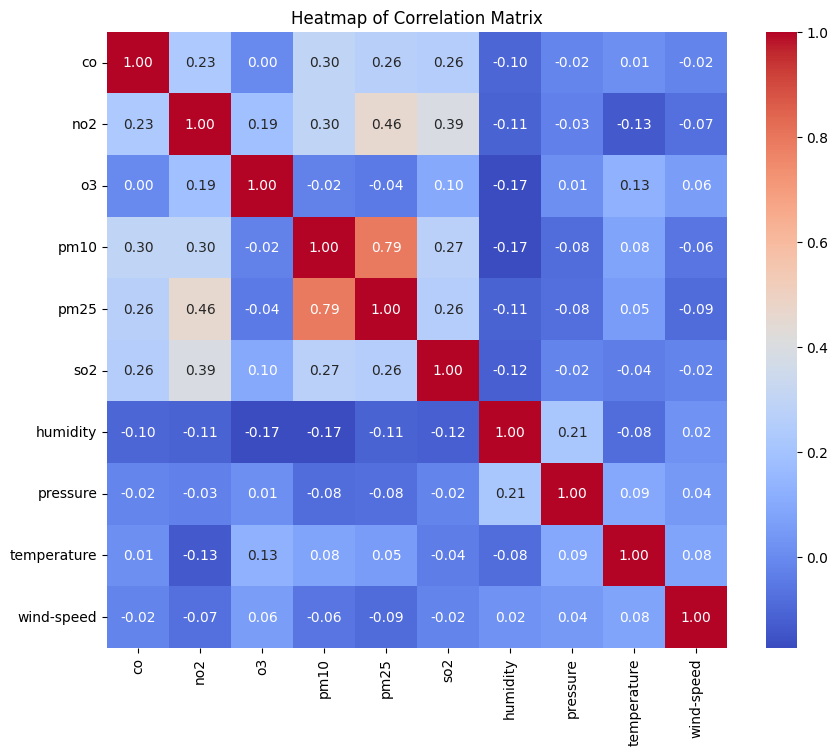

In [22]:
# Calculate the correlation matrix for numeric columns
corr = new_data_cleaned.corr(numeric_only=True)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
#file_name = "correlation_matrix_excluding_O3_Subindex.png"
#path = "/kaggle/working/data-after-combine"
#plt.savefig(path,file_name)
plt.show()

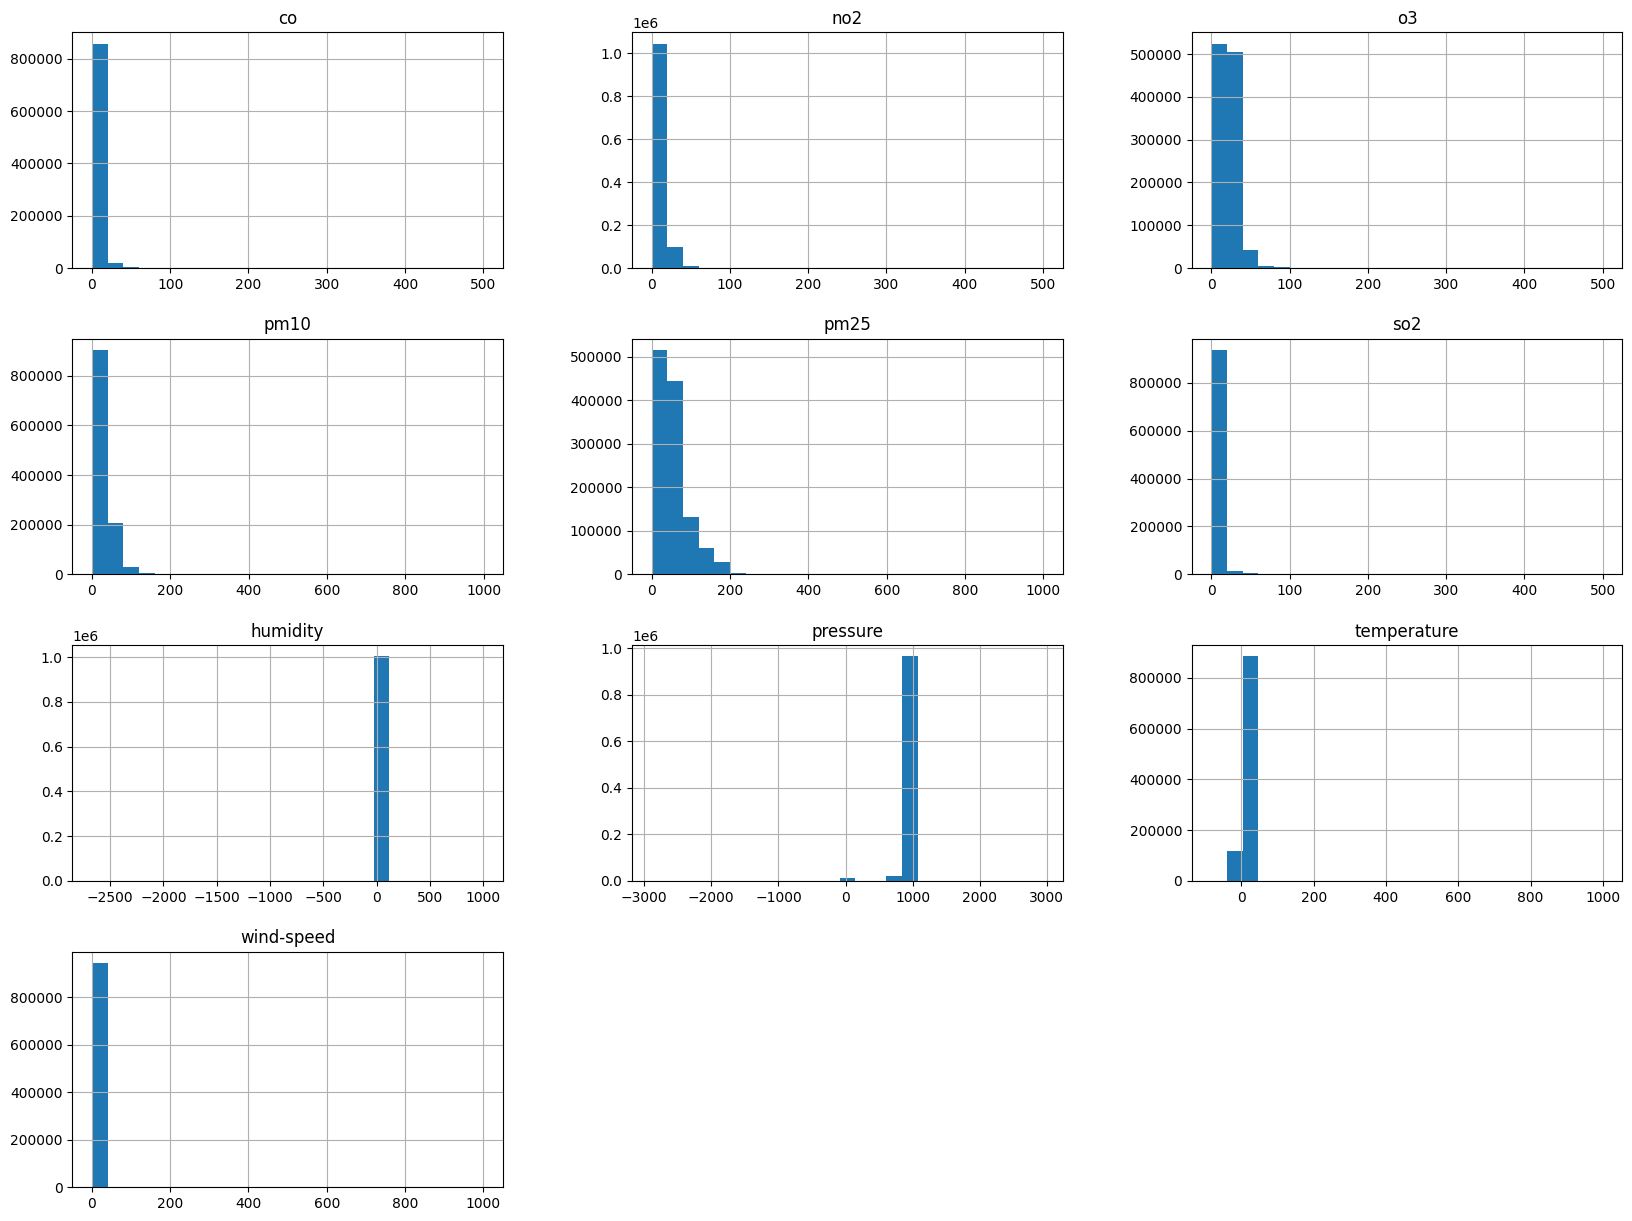

In [23]:
# plot hist plot
new_data_cleaned.hist(bins=25, figsize=(20,15))
#file_name = "hist_plot.png"
#path = "/kaggle/working/data-after-combine"
#plt.savefig(path,file_name)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


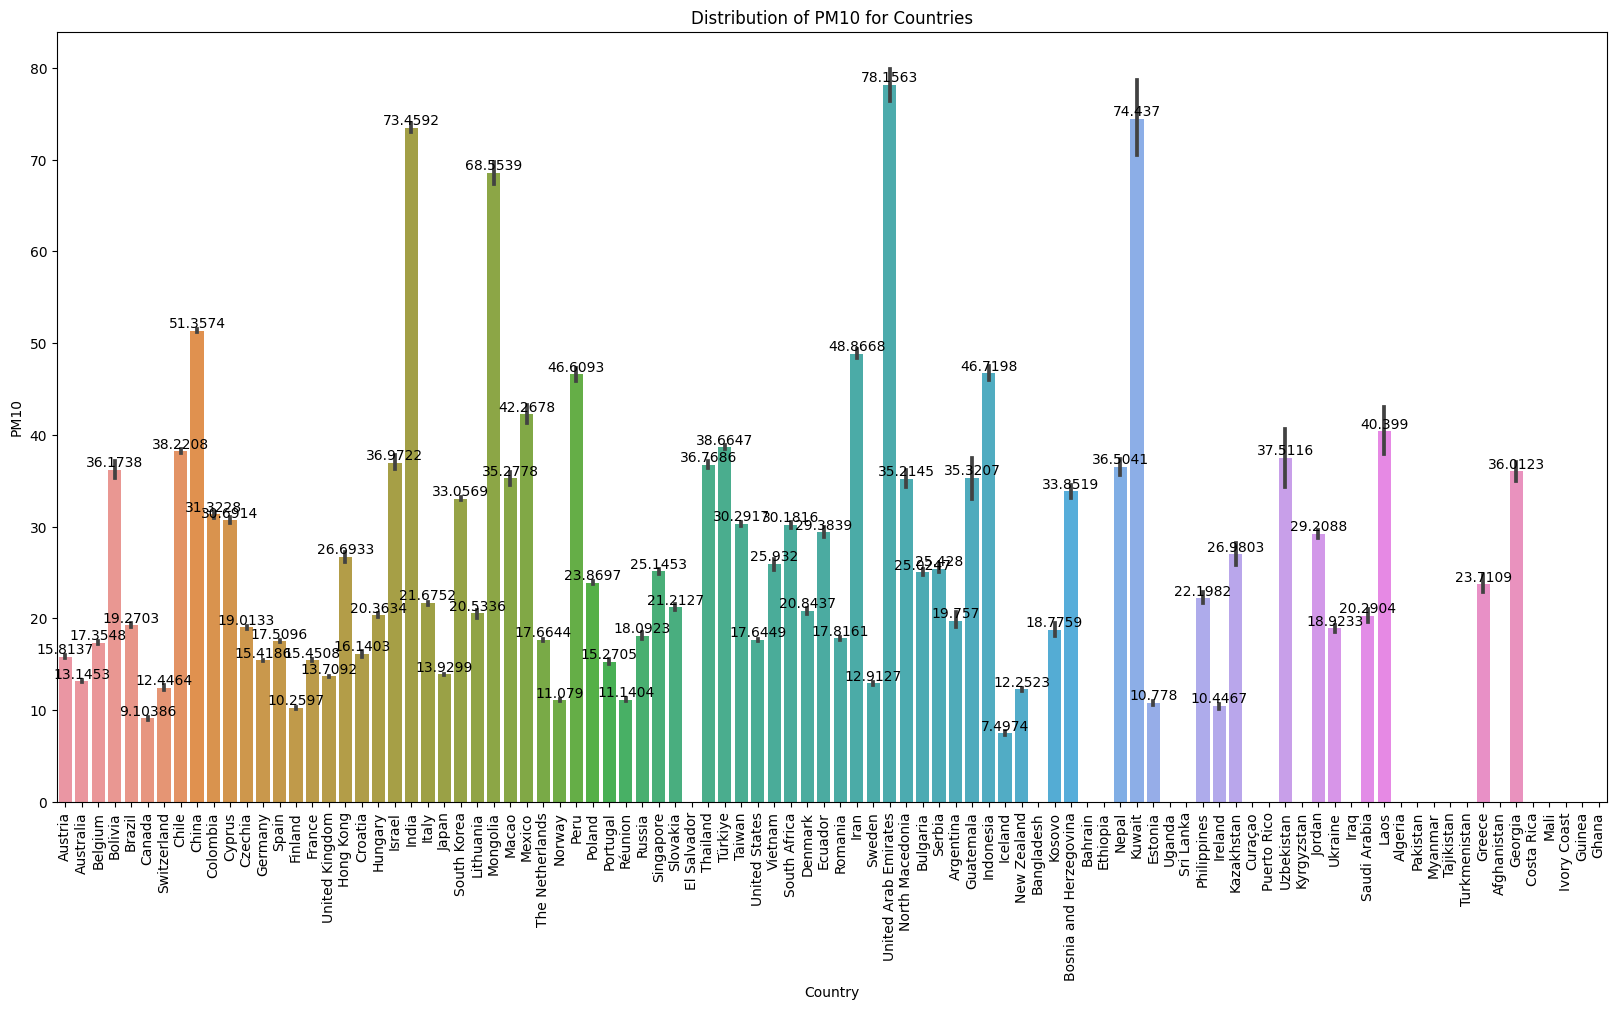

,Country,pm10
0,Afghanistan,NaN
1,Algeria,NaN
2,Argentina,19.757024
3,Australia,13.145304
4,Austria,15.813651
...,...,...
89,United Arab Emirates,78.156313
90,United Kingdom,13.709160
91,United States,17.644862
92,Uzbekistan,37.511628


In [24]:
# Plot the distribution of PM10 for the Countries
ax = sns.barplot(x="Country", y="pm10", data=new_data_cleaned)
ax.figure.set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0]) # Add levels to bars
ax.set_title("Distribution of PM10 for Countries")
ax.set_xlabel("Country")
ax.set_ylabel("PM10")
plt.show()

new_data_cleaned[['Country', 'pm10']].groupby('Country', as_index = False).agg({'pm10':'mean'})

In [25]:
city_pm25 = new_data_cleaned[['City', 'pm25']].groupby('City', as_index=False).agg({'pm25': 'mean'}) #mean PM2.5 for each city

top_10_cities = city_pm25.sort_values(by='pm25', ascending=False).head(10) # Sort by PM2.5 in descending order and top 10

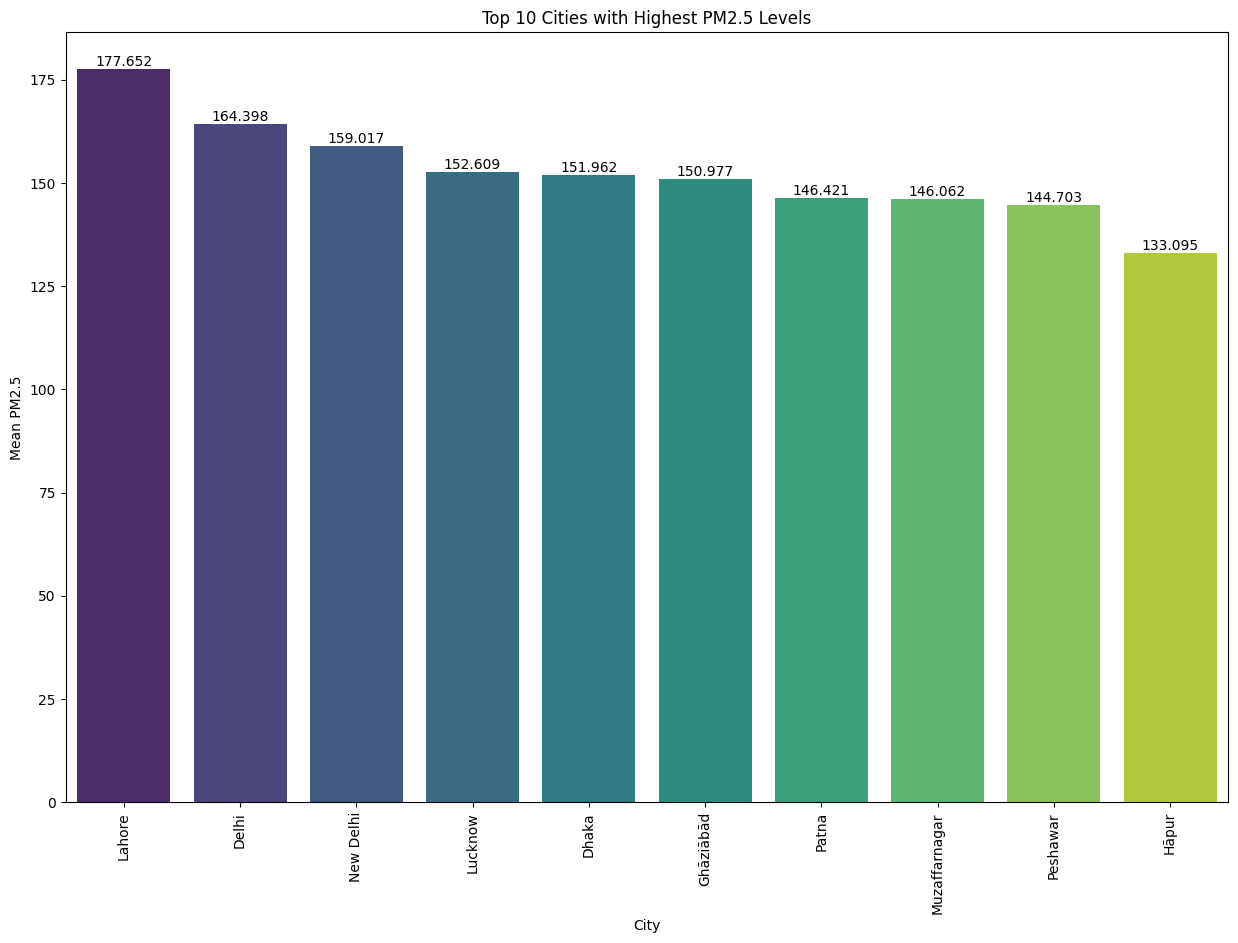

In [26]:
# Plot the distribution of PM2.5 for the top 10 cities
ax = sns.barplot(x="City", y="pm25", data=top_10_cities, palette="viridis")
ax.figure.set_size_inches(15, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0])  # Add labels to bars
plt.title("Top 10 Cities with Highest PM2.5 Levels")
plt.xlabel("City")
plt.ylabel("Mean PM2.5")
plt.show()

In [27]:
new_data_cleaned.columns

Index(['Date', 'Country', 'City', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'humidity', 'pressure', 'temperature', 'wind-speed'],
      dtype='object')

In [28]:
# top 5 countries by mean CO
top_countries = (
    new_data_cleaned.groupby('Country')['co']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the data for only these countries
filtered_data = new_data_cleaned[new_data_cleaned['Country'].isin(top_countries)]

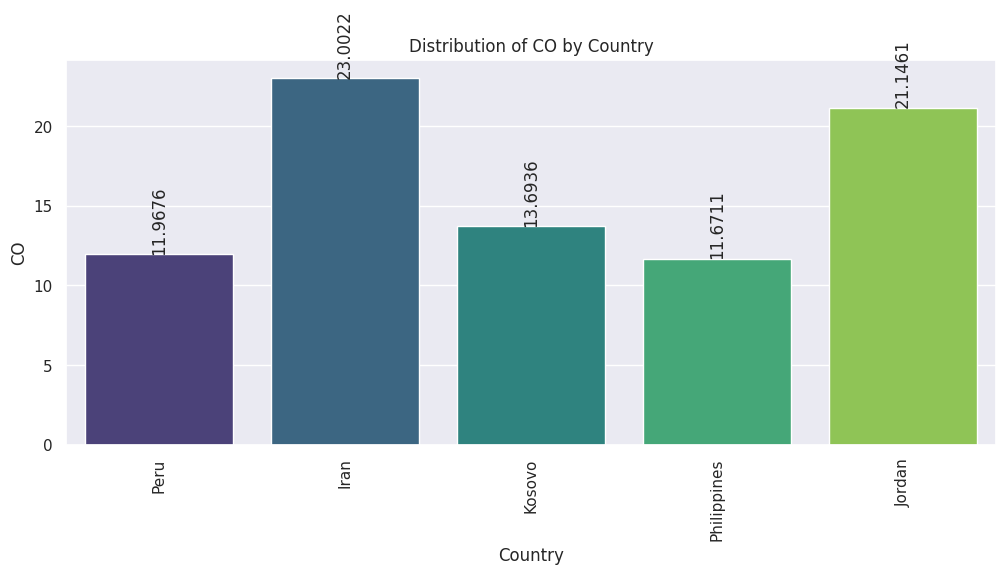

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


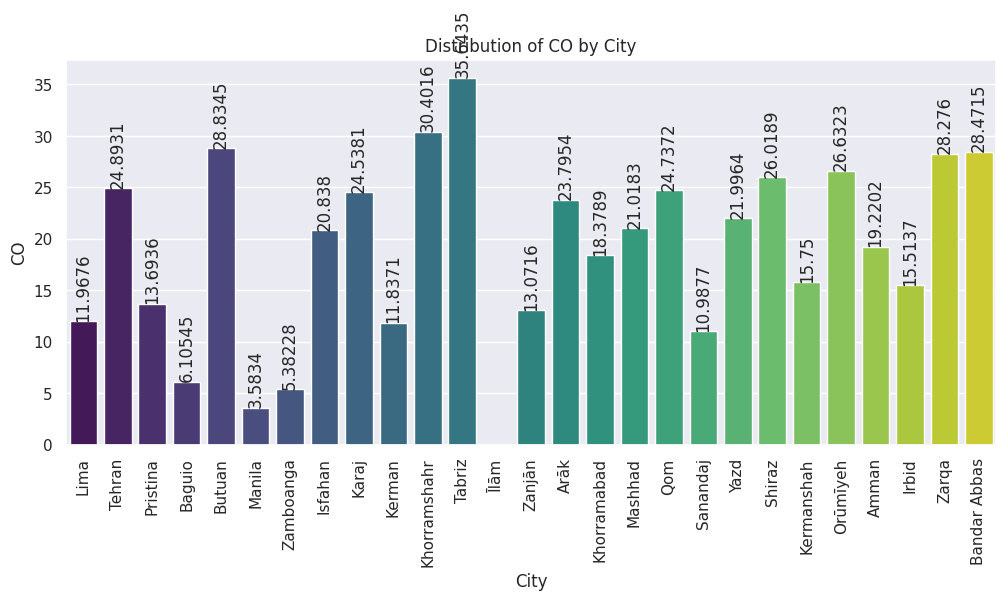

In [29]:
categories = ['Country', 'City']

sns.set(rc={'figure.figsize': (12, 5)})

for c in categories:
    ax = sns.barplot(
        x=c,
        y="co",
        data=filtered_data,
        ci=False,
        palette='viridis'
    )
    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, rotation=90)
    ax.xaxis.set_tick_params(rotation=90)  # Rotate x-axis labels for better readability
    plt.title(f"Distribution of CO by {c}")
    plt.ylabel("CO")
    plt.xlabel(c)
    plt.show()

In [30]:
new_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339286 entries, 0 to 1465291
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Date         1339286 non-null  object 
 1   Country      1339286 non-null  object 
 2   City         1339286 non-null  object 
 3   co           882878 non-null   float64
 4   no2          1153213 non-null  float64
 5   o3           1077987 non-null  float64
 6   pm10         1150739 non-null  float64
 7   pm25         1186937 non-null  float64
 8   so2          958003 non-null   float64
 9   humidity     1003804 non-null  float64
 10  pressure     999758 non-null   float64
 11  temperature  1004627 non-null  float64
 12  wind-speed   946677 non-null   float64
dtypes: float64(10), object(3)
memory usage: 143.1+ MB


<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


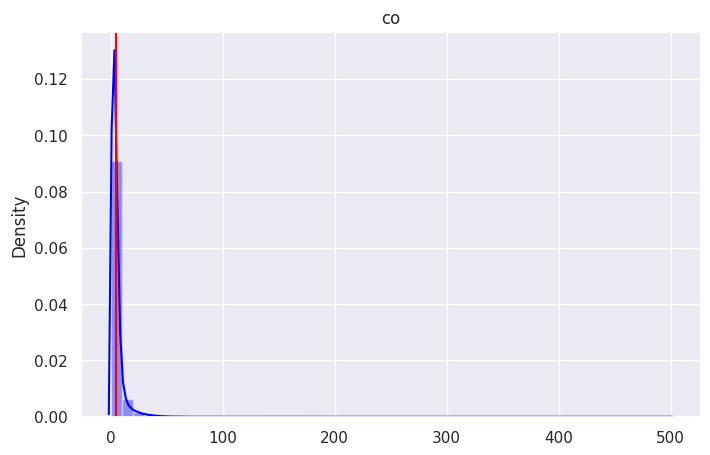

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


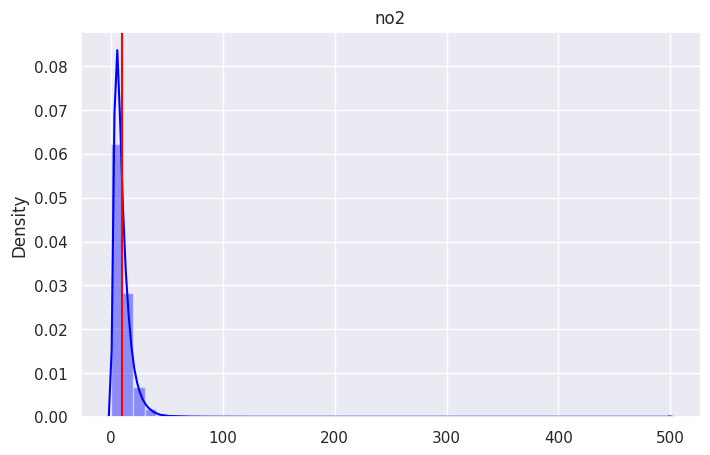

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


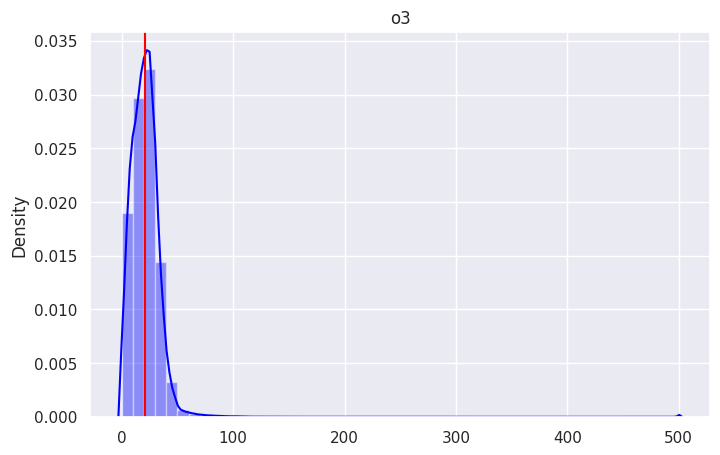

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


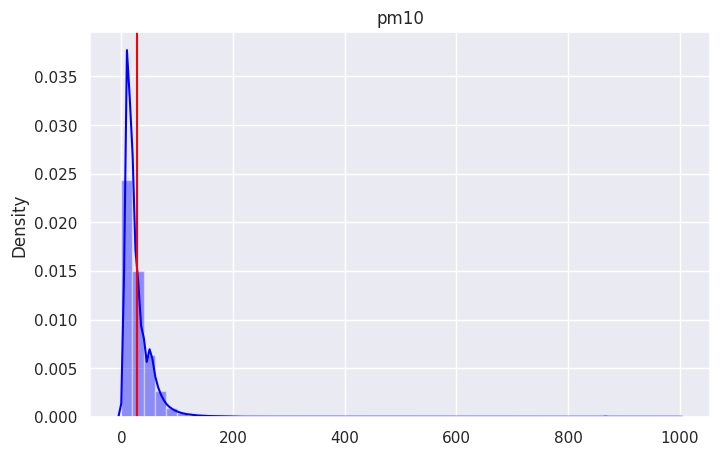

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


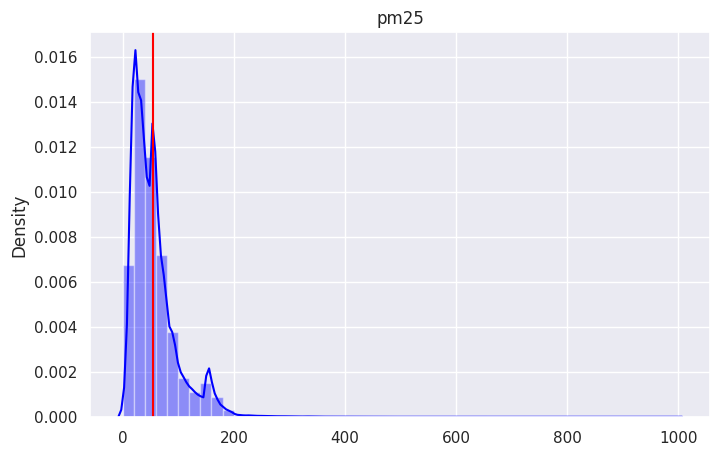

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


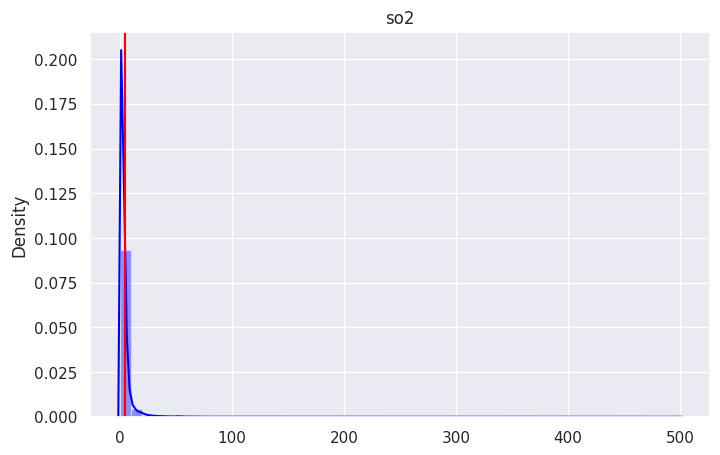

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


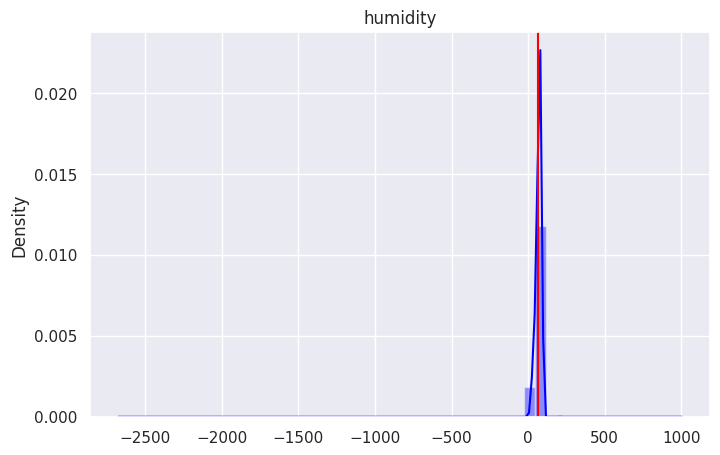

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


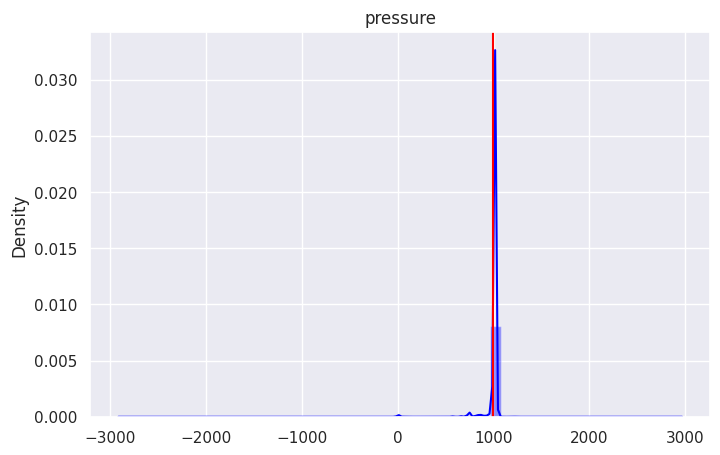

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


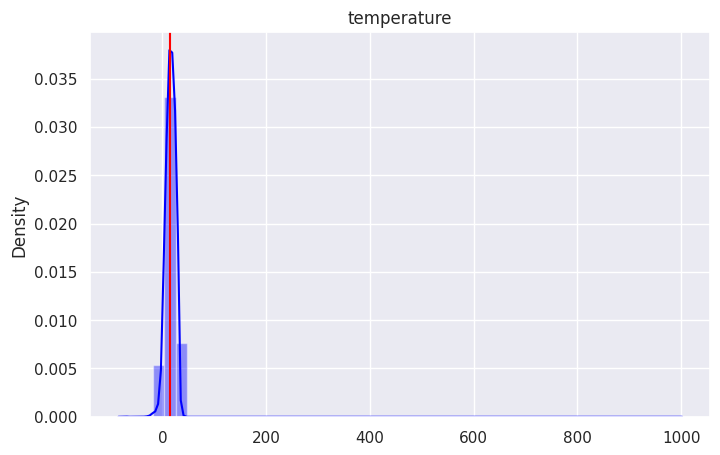

<ipython-input-31-e065b1342f32>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


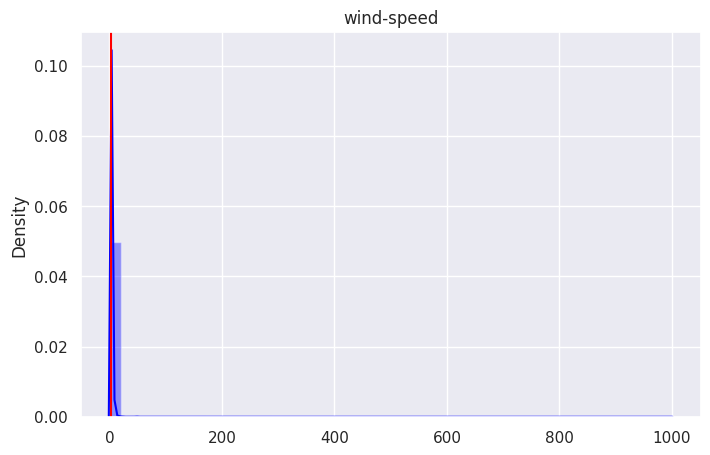

In [31]:
# identifying all numeric columns
numerics = ['int64', 'float64']
n_variables = new_data_cleaned.select_dtypes(include=numerics).columns

# investigate distribution
sns.set(rc={'figure.figsize':(8,5)})

for n in n_variables:
    x = new_data_cleaned[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = new_data_cleaned[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

The median for co is: 3.4


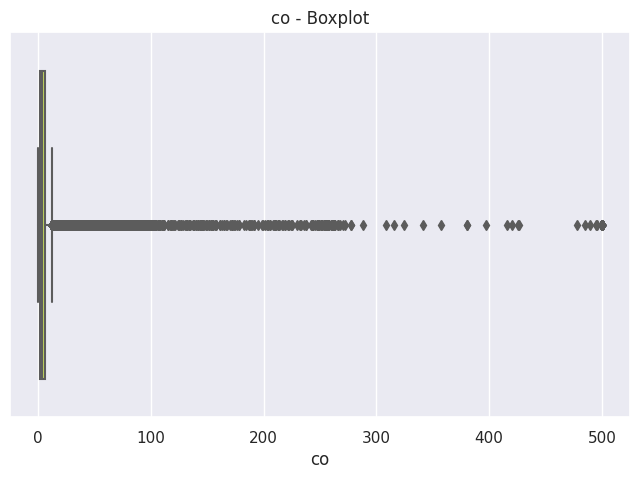

The median for no2 is: 7.8


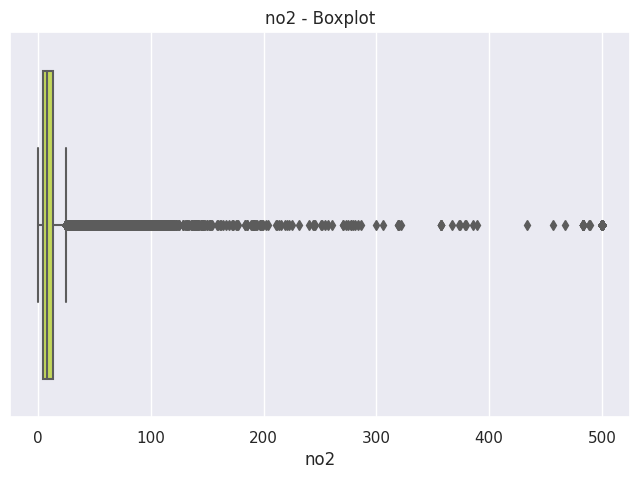

The median for o3 is: 20.3


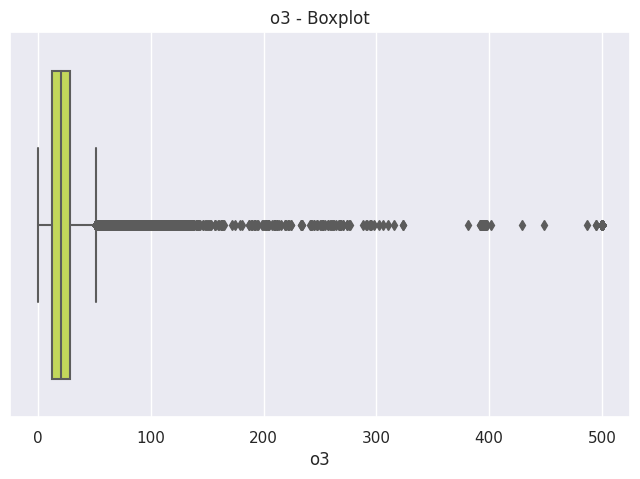

The median for pm10 is: 20.0


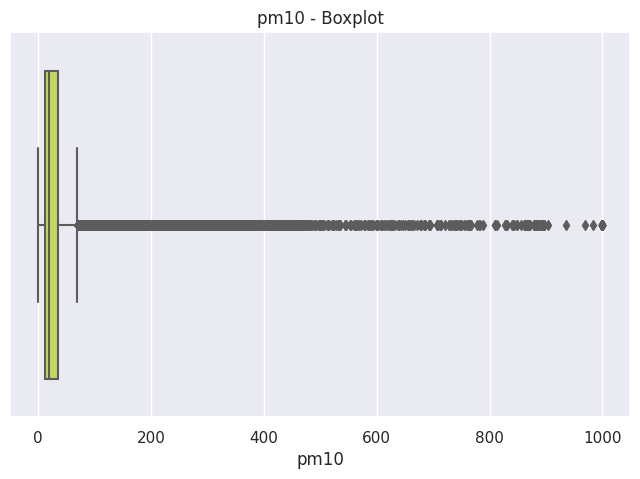

The median for pm25 is: 46.0


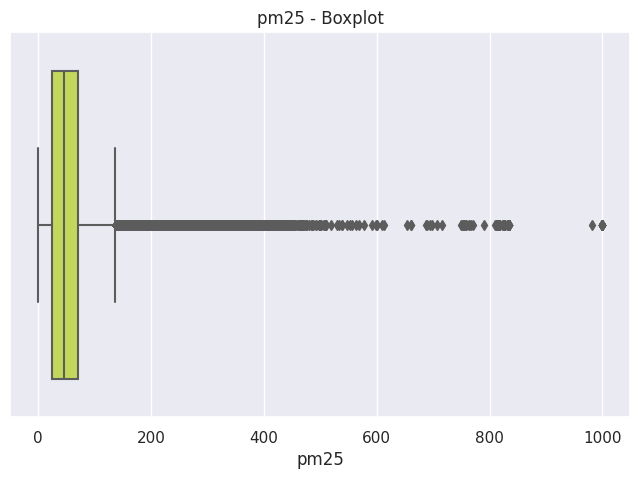

The median for so2 is: 2.6


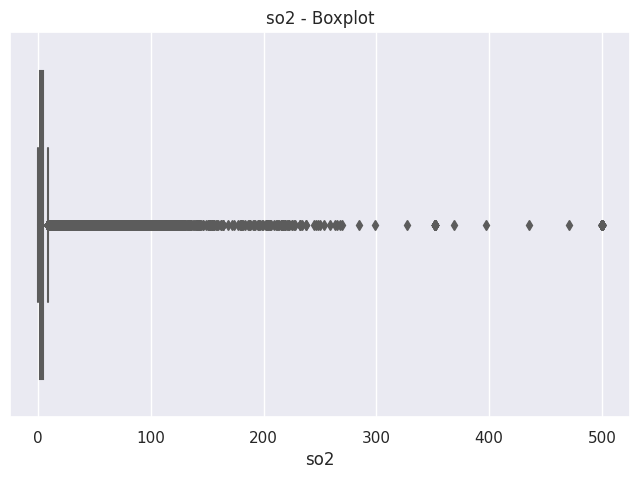

The median for humidity is: 72.0


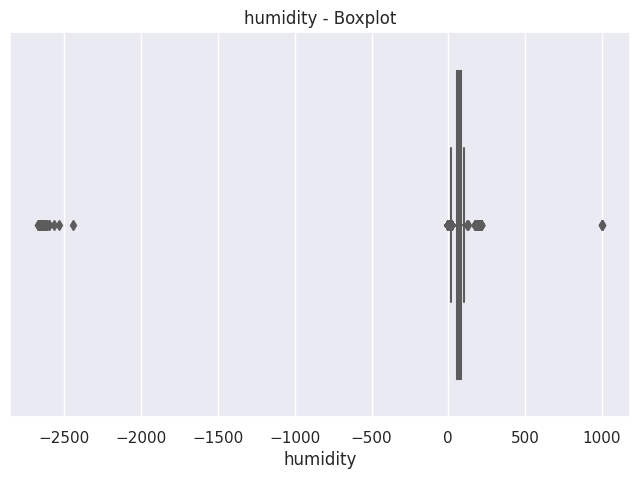

The median for pressure is: 1014.0


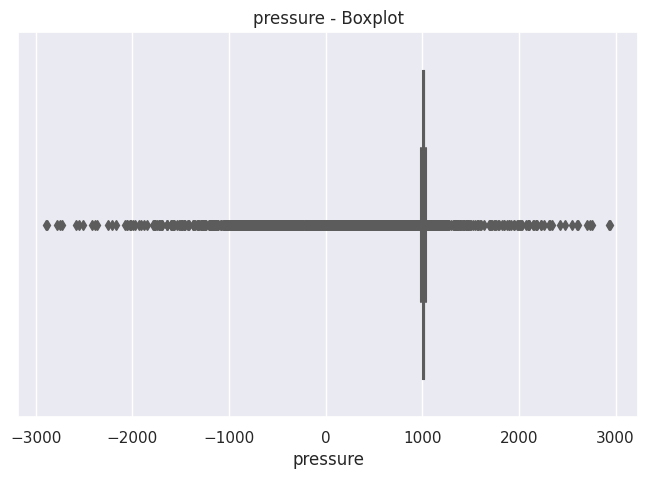

The median for temperature is: 16.0


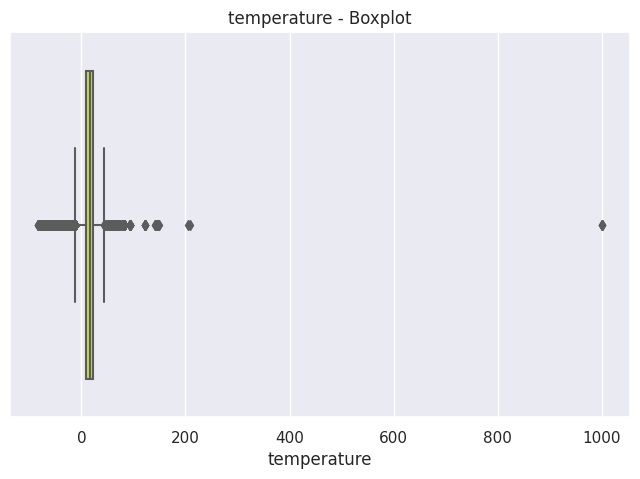

The median for wind-speed is: 2.2


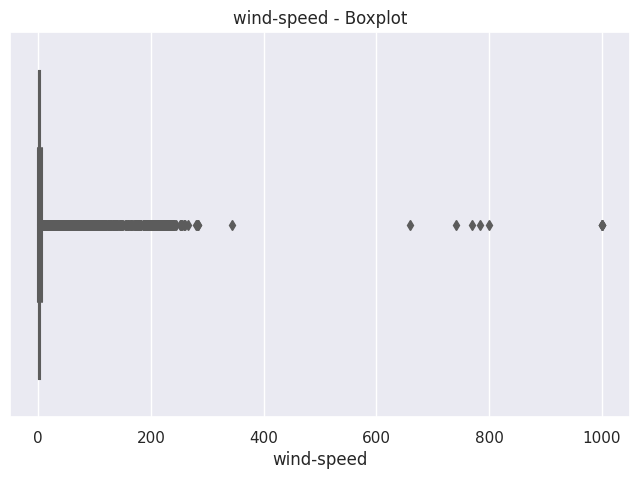

In [32]:
# investigate outliers
sns.set(rc={'figure.figsize': (8, 5)})

for c in n_variables:
    ax = sns.boxplot(x=new_data_cleaned[c], color='#D1EC46')
    plt.title(f"{c} - Boxplot")
    plt.xlabel(c)
    print(f"The median for {c} is: {new_data_cleaned[c].median()}")
    plt.show()

In [33]:
# Find the minimum and maximum dates
min_date = new_data_cleaned['Date'].min()
max_date = new_data_cleaned['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2025-01-09


In [34]:
os.makedirs("/kaggle/working/", exist_ok=True)
new_data_cleaned.to_csv('/kaggle/working/new_data_2015_2024.csv')